In [ ]:
#1996 to 2018
#Global Wind Energy Council
#https://en.wikipedia.org/wiki/File:Global_Wind_Power_Cumulative_Capacity.svg

import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os
import random as rn

os.environ['PYTHONHASHSEED'] = '0'

# Setting the seed for numpy-generated random numbers


# Setting the seed for python random numbers
rn.seed(0)

np.random.seed(0)
tf.random.set_seed(0)
seq=[6.1,7.6,10.2,13.6,17.4,23.9,31.1,39.4,47.6,59.1,74.0,93.9,120.7,159.1,198.0,238.1,282.9,318.7,369.9,432.7,487.3,539.1,591.0]
log_data=np.log(seq)
time=list(range(1996,2019,1))

Using TensorFlow backend.


In [ ]:
x=np.array(time)
y=np.array(seq)
import numpy
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1995, 2025, 30)


In [ ]:
pred=mymodel(myline)
z=list(y)+list(pred.flatten()[-7:])

In [ ]:

x=np.array(list(range(1996,2026,1)))
print(len(x))
print(len(z))

30
30


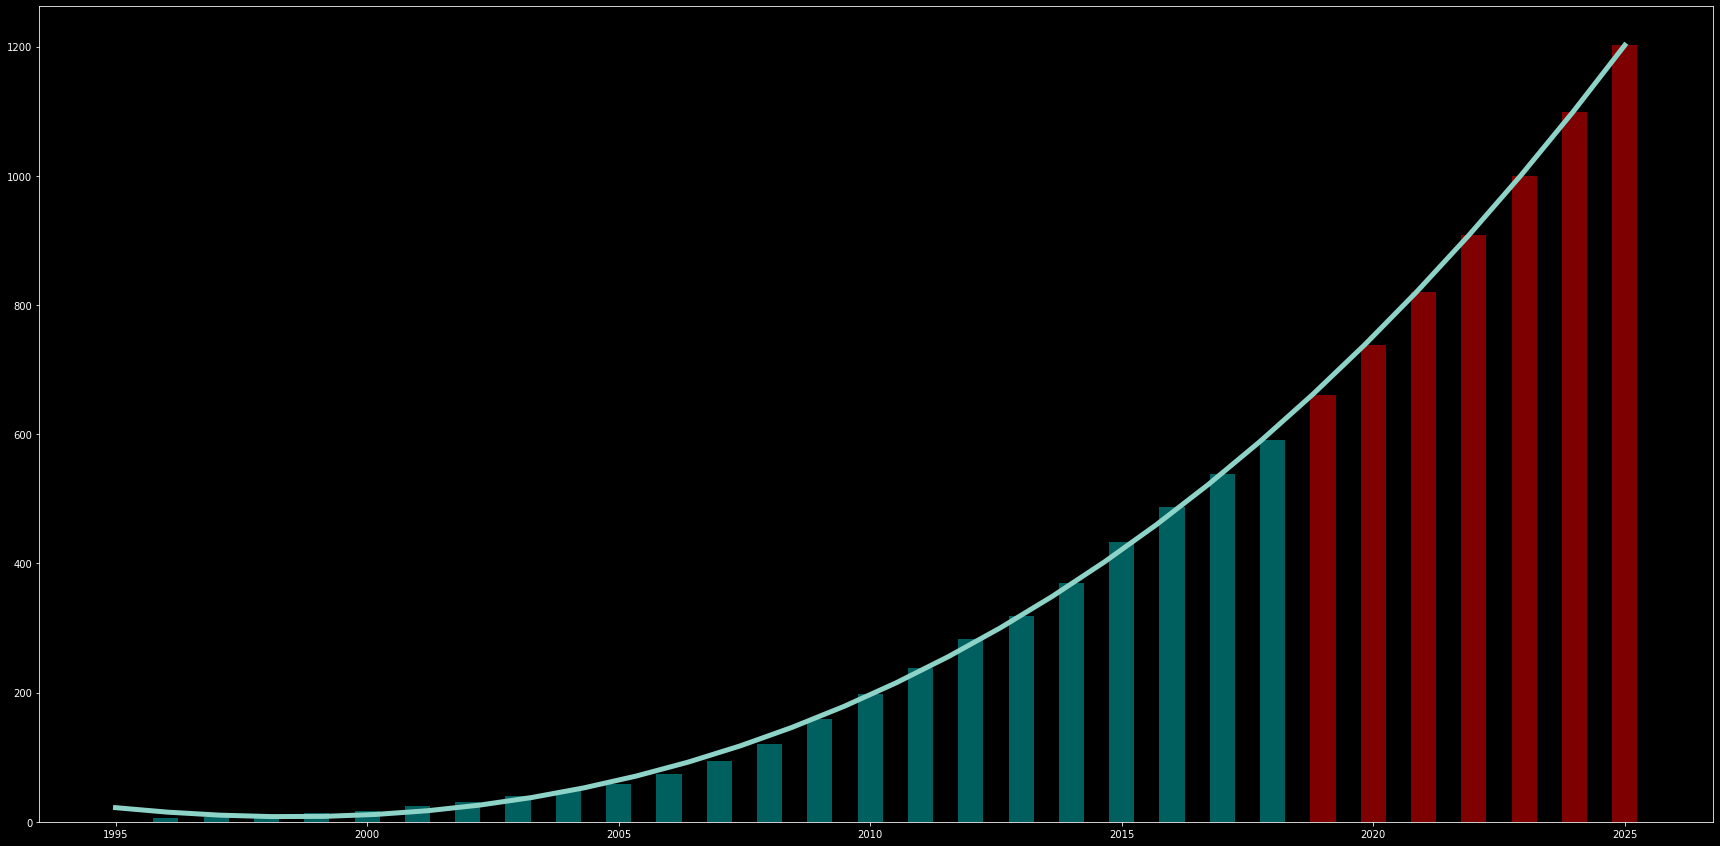

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.grid(False)
plt.style.use('dark_background')
#x=np.array(range(1995,2025,29))
N=len(x)
pred=mymodel(myline)


ind = np.arange(N) 
width = 0.5
colors=23*['c']+7*['r']
bar1=plt.bar(x, z, width, label='50m',color=colors,alpha=0.5)



#plt.scatter(x, y)
plt.plot(myline,pred ,linewidth=5) #marker='o',markersize=10
plt.show() 

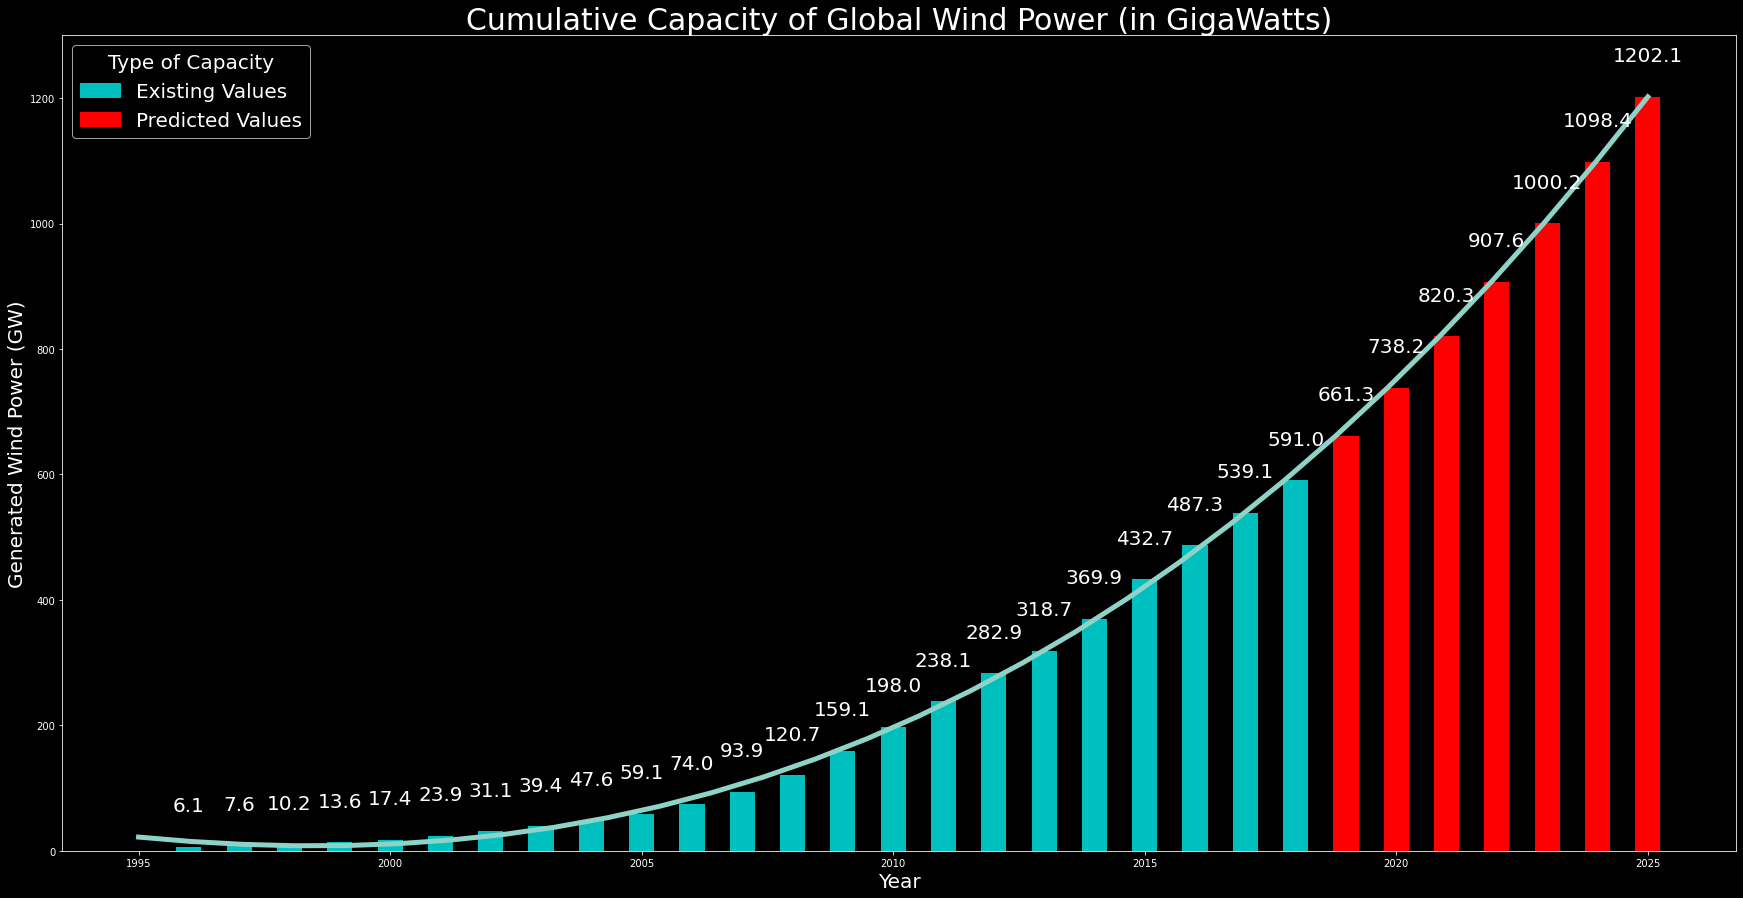

In [ ]:
plt.figure(figsize=(30,15))
plt.grid(False)
plt.style.use('dark_background')
#x=np.array(range(1995,2025,29))
N=len(x)
pred=mymodel(myline)


ind = np.arange(N) 
width = 0.5
colors=23*['c']+7*['r']
bar1=plt.bar(x, z, width, label='50m',color=colors,alpha=1)

for rect,val in zip(bar1,z):
    height = rect.get_height()
    #print(val)
    if(val==0):
      plt.text(rect.get_x() + rect.get_width()/2.0, height+0.01, str("-"), ha='center', va='bottom',fontsize=20)
    else:
      plt.text(rect.get_x() + rect.get_width()/2.0, height+50, str(round(val,1)), ha='center', va='bottom',fontsize=20)


import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

EX = mpatches.Patch(color='c', label='Existing Values')
PR = mpatches.Patch(color='r', label='Predicted Values')
#AP = mpatches.Patch(color='red', label='Asia/Pacific')
#SA = mpatches.Patch(color='yellow', label='South America')
#plt.legend(handles=[NA,EU,AP,SA], loc=2)

#plt.scatter(x, y)
plt.plot(myline,pred ,linewidth=5) #marker='o',markersize=10


#plt.yticks([])
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

plt.xlabel('Year', fontsize=20)
plt.ylabel('Generated Wind Power (GW)', fontsize=20)

plt.title('Cumulative Capacity of Global Wind Power (in GigaWatts)', fontsize=30)

plt.ylim(0,1300)

lg=plt.legend(loc='best',title='Type of Capacity', prop={'size': 20},handles=[EX,PR])
lg.get_title().set_fontsize(20)
lg._legend_box.align = "center"
#plt.legend(loc='center left', bbox_to_anchor=(1, 1),fancybox = True, shadow = True)
plt.savefig("cumulative_capacity.png" ,dpi=100)
plt.show()

plt.show() 

In [ ]:
mymodel(myline)

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt



In [ ]:
# single exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
data = np.array(seq)
# create class
model = SimpleExpSmoothing(data)
# fit model
model_fit = model.fit()
# make prediction
yhat = model_fit.predict()

In [ ]:
model_fit.forecast(12)

In [ ]:
yhat

In [ ]:
seq=[6.1,7.6,10.2,13.6,17.4,23.9,31.1,39.4,47.6,59.1,74.0,93.9,120.7,159.1,198.0,238.1,282.9,318.7,369.9,432.7,487.3,539.1,591.0]
time=list(range(1996,2019,1))

x_data = np.array(time)

y_data = np.array(seq)


log_x_data = np.log(x_data)

log_y_data = np.log(y_data)


curve_fit = np.polyfit(x_data, log_y_data, 1)

print(curve_fit)


y = np.exp(curve_fit[0]) * np.exp(curve_fit[1]*x_data)

plt.plot(x_data, y_data, "o")

plt.plot(x_data, y)

In [ ]:
plt.bar(time,seq)
#plt.plot(time,seq)

In [ ]:



curve_fit = np.polyfit(np.array(time), log_data, 1)

print(curve_fit)

In [ ]:
curve_fit[0]

In [ ]:
curve_fit[1]

In [ ]:
time

In [ ]:
y = np.exp(curve_fit[0]) * np.exp(curve_fit[1]*np.array(time))

plt.plot(np.array(time), np.array(seq), "o")

plt.plot(np.array(time), y)

In [ ]:
time=np.array(time)-1996
X = time.reshape(-1,1)
y = np.array(log_data).reshape(-1,1)

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
X_train

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
X_test

In [ ]:
seq

In [ ]:
pred_time=list(range(2018,2026))
pred_arr=np.array(pred_time)-1996
pred_arr=pred_arr.reshape(-1,1)
print(pred_arr)
regressor.predict(pred_arr)

In [ ]:
np.exp(regressor.predict(pred_arr))

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
close_data = np.array(seq).reshape((-1,1))

split_percent = 0.70
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]


print(len(close_train))
print(len(close_test))

In [ ]:
look_back = 6

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=1)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=3)


model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 30
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

In [ ]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))


In [ ]:
prediction

In [ ]:
dir(test_generator)


In [ ]:
close_data = close_data.reshape((-1))
print(close_data)

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        print(x)
        out = model.predict(x)[0][0]
        print(out)
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    


num_prediction = 8
forecast = predict(num_prediction, model)
print(forecast)
#forecast_dates = predict_dates(num_prediction)

In [ ]:
#[ 591.          828.46136475 1023.57403564 1205.86376953 1439.38427734 1764.12072754 2207.29370117 2669.37963867 3241.99511719]
seq

In [ ]:
seq

In [ ]:
log_data=np.log(seq)

In [ ]:
time=list(range(1996,2019,1))
time=np.array(time)-1996

In [ ]:
len(log_data)

In [ ]:
len(time)

In [ ]:
len(seq)

In [ ]:
print(log_data)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    #x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    #y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
    x=log_data
    y=np.array(seq)
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
main()

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

# load the boston dataset 
#boston = datasets.load_boston(return_X_y=False) 

# defining feature matrix(X) and response vector(y) 
X = np.array(seq)
y = log_data 


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
													random_state=1) 

X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# create linear regression object 
reg = linear_model.LinearRegression() 

# train the model using the training sets 
reg.fit(X_train, y_train) 

# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
			color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
			color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 
